In [4]:
from datetime import datetime

#import pyodbc
import sqlalchemy
#import sqlalchemy as msql
#import Connexion_bdd as Cx_bdd
import numpy as np
import pandas as pd
import Requetes_SQL as Req_SQL
import matplotlib.pyplot as plt
import seaborn as sns
import tsfresh #TimeSeries Transformation library


from sklearn import feature_selection
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split, KFold, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import metrics, tree

In [5]:
#Project Classes
#import FSQL_Classes as FSQLC
import Sql_Alchemy_Classes as AlSQL
import Parcours_Classes as PC

### Get the data

In [6]:
from datetime import timedelta

My_NIP_filter_1rst_date=datetime.strptime('01-01-2019 00:00:00', '%m-%d-%Y %H:%M:%S')
My_NIP_filter_2nd_date=My_NIP_filter_1rst_date + timedelta(days=7)

Site='2'

Mydataset_date1=datetime.strptime('01-01-2019 00:00:00', '%m-%d-%Y %H:%M:%S')
Mydataset_date2=datetime.strptime('12-31-2020 00:00:00', '%m-%d-%Y %H:%M:%S')

Caract_Df_SH = pd.DataFrame.from_dict(PC.Caracteristiques_Dataset_Parcours(1, My_NIP_filter_1rst_date,My_NIP_filter_2nd_date,Site,Mydataset_date1,Mydataset_date2).get_x())

EXECUTE dbo.Delete_Table_if_exists Tmp_Py_A_Actes_Export
STEP 1.0 : Delete old Tables
2023-11-07 13:28:49,714 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-11-07 13:28:49,715 INFO sqlalchemy.engine.Engine EXECUTE dbo.Delete_Table_if_exists Tmp_Py_A_Actes_Export
2023-11-07 13:28:49,716 INFO sqlalchemy.engine.Engine [generated in 0.00094s] ()
2023-11-07 13:28:49,722 INFO sqlalchemy.engine.Engine COMMIT
AlSQL_Execution - OK
STEP 1.1 : Filter NIP ON /n Site = 2/n Date1  = 2019-01-01 00:00:00 - Date2  = 2019-01-08 00:00:00 - launched at 2023-11-07 13:28:49.724215
2023-11-07 13:28:49,724 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-11-07 13:28:49,725 INFO sqlalchemy.engine.Engine  EXECUTE Preproc_A0_Filter_NIP_BY_2_DATES_AND_SITE_AND_DATASET_ON_2_DATES A_Actes_ICO_2018_2021_V2_TRIMED,Tmp_Py_A_Actes_Export,'2019-01-01 00:00:00','2019-01-08 00:00:00','2019-01-01 00:00:00','2020-12-31 00:00:00',2
2023-11-07 13:28:49,725 INFO sqlalchemy.engine.Engine [generated in 0.00046s] ()
2023-

In [7]:
#Get all actes in the Dataset

Requete = """
  SELECT *
  FROM [ICO_Activite].[dbo].[Tmp_A_Actes_Table_Analyse]
  """

Actes_Total=AlSQL.AlSQL_Requete(AlSQL.engine,Requete,True) #FSQLC.F_SQL_Requete(FSQLC.cnxn,Requete,FSQLC.pyodbc,'No')

2023-11-07 13:29:11,274 INFO sqlalchemy.engine.Engine 
  SELECT *
  FROM [ICO_Activite].[dbo].[Tmp_A_Actes_Table_Analyse]
  
2023-11-07 13:29:11,275 INFO sqlalchemy.engine.Engine [raw sql] ()
AlSQL_Requete - OK


In [8]:
Actes_Total

,ID_A,NIP,N_S,DD_A,DF_A,DD_M,HD_M,DF_M,HF_M,UFX,...,AC_Asso,Lc_Prix,UFH,UFH_L,Prix_Acte,Cout_Acte,Statut,Code_Equip,Site,Source
0,13734188,N199701151,N1908717,2019-09-30,2019-09-30,1899-12-30,1899-12-30,1899-12-30,1899-12-30,9061,...,0,93.03,,,,,E,,2,NGAP
1,13734189,N199701151,N1908717,2019-09-30,2019-09-30,1899-12-30,1899-12-30,1899-12-30,1899-12-30,9061,...,0,93.03,,,,,E,,2,NGAP
2,13734194,N199701151,N1908717,2019-09-30,2019-09-30,1899-12-30,1899-12-30,1899-12-30,1899-12-30,9065,...,0,166.05,,,,,E,,2,NGAP
3,13734210,N200702732,N1908525,2019-09-30,2019-09-30,1899-12-30,1899-12-30,1899-12-30,1899-12-30,8532,...,0,550,,,,,E,,2,NGAP
4,591775,N201506900,N1778546,2019-01-15,2019-01-15,1899-12-30,1899-12-30,1899-12-30,1899-12-30,8920,...,0,,,,0,0,E,,2,CCAM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203095,15157309,N201505605,N1996972,2020-03-18,2020-03-18,1899-12-30,1899-12-30,1899-12-30,1899-12-30,1933,...,0,0.27,,,,,H,,2,NGAP
203096,15157437,N199300284,N1981701,2020-02-18,2020-02-18,1899-12-30,1899-12-30,1899-12-30,1899-12-30,9052,...,0,2,,,,,E,,2,NGAP
203097,15157515,N201703467,N1987545,2020-02-28,2020-02-28,1899-12-30,1899-12-30,1899-12-30,1899-12-30,9052,...,0,2,,,,,E,,2,NGAP
203098,15157616,N198604377,N1974629,2020-02-05,2020-02-05,1899-12-30,1899-12-30,1899-12-30,1899-12-30,9052,...,0,3.15,,,,,E,,2,NGAP


AFFICHAGE DES PARCOURS COMPLETS DES PATIENTS SELECTIONNES

In [9]:
#Recuperer une table acte pour affichage
Requete="""SELECT Table_Acte.[NIP]
	  --,Table_Cluster.Cluster
	  --,Table_Cluster.X_abscisse
      ,Table_Acte.[J_Parcours_V1]
      ,Table_Acte.[J_Parcours_V3]
      ,Table_Acte.[Service]
      ,Table_Acte.[Activite]
      ,Table_Acte.[Phase]
      ,Table_Acte.[Dimension]
      ,Table_Acte.[Type_seq]
  FROM [ICO_Activite].[dbo].[Tmp_Carac_Actes] as Table_Acte
	 --, [ICO_Activite].[dbo].[Tmp_NIP_Cluster] as Table_Cluster
  
  --WHERE Table_Cluster.NIP = Table_Acte.NIP
"""
df_Actes_graph=AlSQL.AlSQL_Requete(AlSQL.engine,Requete,'No')


2023-11-07 13:29:14,479 INFO sqlalchemy.engine.Engine SELECT Table_Acte.[NIP]
	  --,Table_Cluster.Cluster
	  --,Table_Cluster.X_abscisse
      ,Table_Acte.[J_Parcours_V1]
      ,Table_Acte.[J_Parcours_V3]
      ,Table_Acte.[Service]
      ,Table_Acte.[Activite]
      ,Table_Acte.[Phase]
      ,Table_Acte.[Dimension]
      ,Table_Acte.[Type_seq]
  FROM [ICO_Activite].[dbo].[Tmp_Carac_Actes] as Table_Acte
	 --, [ICO_Activite].[dbo].[Tmp_NIP_Cluster] as Table_Cluster
  
  --WHERE Table_Cluster.NIP = Table_Acte.NIP

2023-11-07 13:29:14,480 INFO sqlalchemy.engine.Engine [raw sql] ()
AlSQL_Requete - OK


In [10]:

# Fonction pour générer des valeurs uniques
def generate_unique_values(df):
    unique_values = {}
    new_column = []
    for nip in df['NIP']:
        if nip not in unique_values:
            unique_values[nip] = len(unique_values) + 1
        new_column.append(unique_values[nip])
    return new_column

# Ajoutez une nouvelle colonne avec des valeurs uniques
df_Actes_graph['ID_NIP'] = generate_unique_values(df_Actes_graph)






<Axes: title={'center': 'Carepathes'}, xlabel='ID_NIP', ylabel='J_Parcours_V1'>

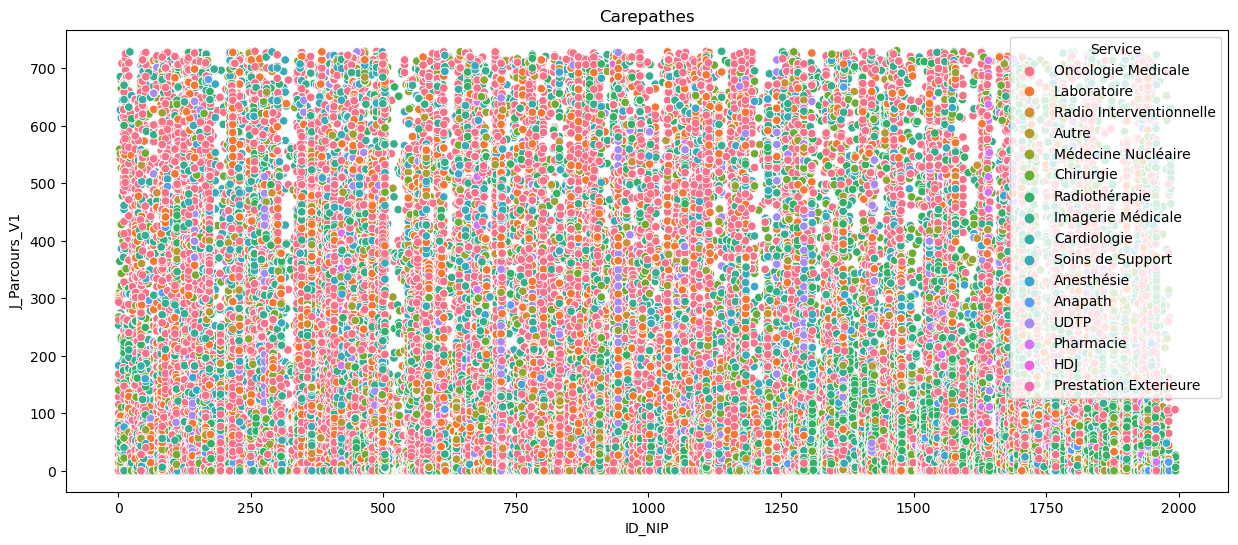

In [11]:
#Affichage des parcours

fig, axs = plt.subplots(1, 1, figsize=(15, 6))

data_graph=df_Actes_graph

axs.set_title('Carepathes')
sns.scatterplot(data=df_Actes_graph, x='ID_NIP', y='J_Parcours_V1',markers='Activite', hue='Service')

AFFICHAGE DES PARCOURS RADIOTHERAPIE DES PATIENTS

2023-11-07 13:29:23,536 INFO sqlalchemy.engine.Engine SELECT Table_Acte.[NIP]
	  --,Table_Cluster.Cluster
	  --,Table_Cluster.X_abscisse
      ,Table_Acte.[J_Parcours_V1]
      ,Table_Acte.[J_Parcours_V3]
      ,Table_Acte.[Service]
      ,Table_Acte.[Activite]
      ,Table_Acte.[Phase]
      ,Table_Acte.[Dimension]
      ,Table_Acte.[Type_seq]
  FROM [ICO_Activite].[dbo].[Tmp_Carac_Actes] as Table_Acte
	 --, [ICO_Activite].[dbo].[Tmp_NIP_Cluster] as Table_Cluster
  
  WHERE Table_Acte.[Service] = 'Radiothérapie'

2023-11-07 13:29:23,536 INFO sqlalchemy.engine.Engine [raw sql] ()
AlSQL_Requete - OK


<Axes: title={'center': 'Carepathes'}, xlabel='ID_NIP', ylabel='J_Parcours_V1'>

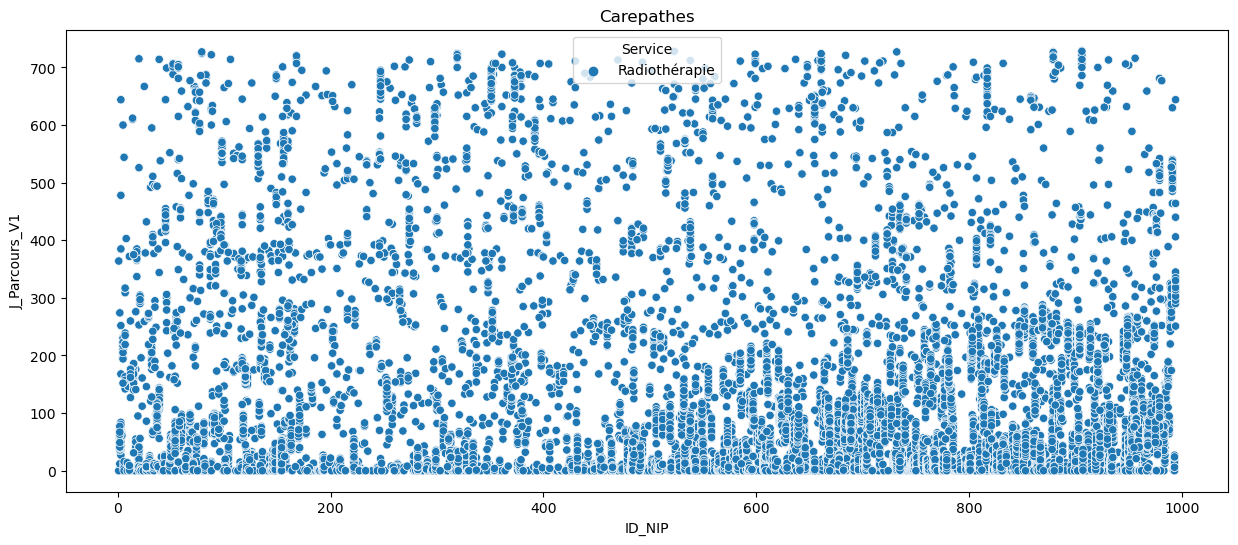

In [12]:
#Recuperer une table acte pour affichage
Requete="""SELECT Table_Acte.[NIP]
	  --,Table_Cluster.Cluster
	  --,Table_Cluster.X_abscisse
      ,Table_Acte.[J_Parcours_V1]
      ,Table_Acte.[J_Parcours_V3]
      ,Table_Acte.[Service]
      ,Table_Acte.[Activite]
      ,Table_Acte.[Phase]
      ,Table_Acte.[Dimension]
      ,Table_Acte.[Type_seq]
  FROM [ICO_Activite].[dbo].[Tmp_Carac_Actes] as Table_Acte
	 --, [ICO_Activite].[dbo].[Tmp_NIP_Cluster] as Table_Cluster
  
  WHERE Table_Acte.[Service] = 'Radiothérapie'
"""
df_Actes_graph=AlSQL.AlSQL_Requete(AlSQL.engine,Requete,'No')

# Ajoutez une nouvelle colonne avec des valeurs uniques
df_Actes_graph['ID_NIP'] = generate_unique_values(df_Actes_graph)

#Affichage des parcours

fig, axs = plt.subplots(1, 1, figsize=(15, 6))

data_graph=df_Actes_graph

axs.set_title('Carepathes')
sns.scatterplot(data=df_Actes_graph, x='ID_NIP', y='J_Parcours_V1',markers='Activite', hue='Service')


APPLICATION D'UNE FONCTION D'AGGREGATION:

In [13]:
# Requete d'aggrégation 

Requete="""EXECUTE [dbo].[ReportCarePathActivtiy_By_actes] 
   2 --PARAMETER 1 :CHOICE
   		-- 0 : REPORT DAYLY turnover from stardate of calendar (1 column = 1 DAY), CURSOR LINES ARE DAYS
		-- 1 : REPORT WEEKLY turnover from stardate of calendar  (1 column = 1 WEEK), CURSOR LINES ARE WEEKS
		-- 2 : REPORT MONTHLY turnover from stardate of calendar  (1 column = 1 month), CURSOR LINES ARE MONTHS
		-- 3 : REPORT TRIMESTER turnover for the @YEAR (1 column = 3 months), CURSOR LINES ARE TRIMESTERS
		-- 4 : REPORT ALL YEAR turnovers (1 column = 1 Year), CURSOR LINES ARE YEARS
  ,'2019-05-01 00:00:00.000' --PARAMETER 2 : @startdate --OK
  ,'2019-05-10 00:00:00.000' --PARAMETER 3 : @enddate --OK
  ,'PARCOURS' --PARAMETER 3: @AggParameter as nvarchar(20)
				--TYPE D'AGGREGATION (PAR DATE CALENDAIRE, PAR DATE PARCOURS)
				--CALENDAR
				--PARCOURS
  ,''
  ,0 --PARAMETER 4 : @AggParameter_min as int (NB jours)
  ,18 --PARAMETER 5 : @AggParameter_max as int (NB jours)
  ,'PRESENCE'	-- PARAMETER 4 : @AggMeth as nvarchar(20) --OK
		--PRESENCE : -> FUNCTION COUNT
		--COUNT -> FUNCTION SUM
		--DENSITE -> Function SUM / Length of aggregation choice (1, 7, 30.41 , 365.25)
  ,'6'	-- PARAMETER 5  @Filter1_type as nvarchar(20)
		--0-ALL
		--1-SERVICE -> from Listing_UF_V3
		--2-ACTIVITE -> from Listing_UF_V3
		--3-PHASE PARCOURS -> from Listing_UF_V3
		--4-DIMENSION PARCOURS -> from Listing_UF_V3
		--5-POIDS ACTE -> from Listing_UF_V3
		--6-TYPE DE SEQUENCE -> from Tmp_Type_Seq
		--7-TYPE DE PARCOURS-- -> (After Clustering only)
		--8-R_NGAP
		--9-R_CCAM
		--10-Statut
		--11-UFH
		--12-INX

	,'TRAIT' -- PARAMETER 6  @@Filter1_value as nvarchar(20)
	,'1'	-- PARAMETER 7  @@Filter2_type as nvarchar(20)
		--0-ALL
		--1-SERVICE -> from Listing_UF_V3
		--2-ACTIVITE -> from Listing_UF_V3
		--3-PHASE PARCOURS -> from Listing_UF_V3
		--4-DIMENSION PARCOURS -> from Listing_UF_V3
		--5-POIDS ACTE -> from Listing_UF_V3
		--6-TYPE DE SEQUENCE -> from Tmp_Type_Seq
		--7-TYPE DE PARCOURS-- -> (After Clustering only)
		--8-R_NGAP
		--9-R_CCAM
		--10-Statut
		--11-UFH
		--12-INX

	,'Radiothérapie' -- PARAMETER 8  @@Filter2_type as nvarchar(20)
	,'V3'  --PARAMETER 9 @TypeJ0 as nvarchar(20)
		--V1
		--V2
		--V3
		--V4"""


Aggreg_Patients=AlSQL.AlSQL_Requete(AlSQL.engine,Requete,True)
Aggreg_Patients

2023-11-07 13:29:24,689 INFO sqlalchemy.engine.Engine EXECUTE [dbo].[ReportCarePathActivtiy_By_actes] 
   2 --PARAMETER 1 :CHOICE
   		-- 0 : REPORT DAYLY turnover from stardate of calendar (1 column = 1 DAY), CURSOR LINES ARE DAYS
		-- 1 : REPORT WEEKLY turnover from stardate of calendar  (1 column = 1 WEEK), CURSOR LINES ARE WEEKS
		-- 2 : REPORT MONTHLY turnover from stardate of calendar  (1 column = 1 month), CURSOR LINES ARE MONTHS
		-- 3 : REPORT TRIMESTER turnover for the @YEAR (1 column = 3 months), CURSOR LINES ARE TRIMESTERS
		-- 4 : REPORT ALL YEAR turnovers (1 column = 1 Year), CURSOR LINES ARE YEARS
  ,'2019-05-01 00:00:00.000' --PARAMETER 2 : @startdate --OK
  ,'2019-05-10 00:00:00.000' --PARAMETER 3 : @enddate --OK
  ,'PARCOURS' --PARAMETER 3: @AggParameter as nvarchar(20)
				--TYPE D'AGGREGATION (PAR DATE CALENDAIRE, PAR DATE PARCOURS)
				--CALENDAR
				--PARCOURS
  ,''
  ,0 --PARAMETER 4 : @AggParameter_min as int (NB jours)
  ,18 --PARAMETER 5 : @AggParameter_max as

,NIP,1900-M1,1900-M2,1900-M3,1900-M4,1900-M5,1900-M6,1900-M7,1900-M8,1900-M9,1900-M10,1900-M11,1900-M12,1901-M1,1901-M2,1901-M3,1901-M4,1901-M5,1901-M6,1901-M7
0,N197403668,,,,,,,,,,,,,,,,,,,
1,N198300356,,,,,,,,,,,,,,,,,,,
2,N198300511,,,,,,,,,,,,,,,,,,,
3,N198302025,,,,,,,,,,,,,,,,,,,
4,N198302546,,,,,,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,N201900121,,,,,,,,,,,,,,,,,1,1,
1990,N201900122,,,,,,,,,,1,1,1,,,,,,,
1991,N201900123,,,,,,,,,,,,,,,,,,,
1992,N201900413,,,,,,,,1,1,1,1,,,,,,,,


In [14]:
#Try a clustering on this table to create different categories of patients based on their Radiotherapie Treatment.

#X_df = pd.concat([X1_encoded, X2_encoded], axis=1)
X_df = Aggreg_Patients.loc[:,Aggreg_Patients.columns !="NIP"]
X_df=X_df.replace('',0)

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)


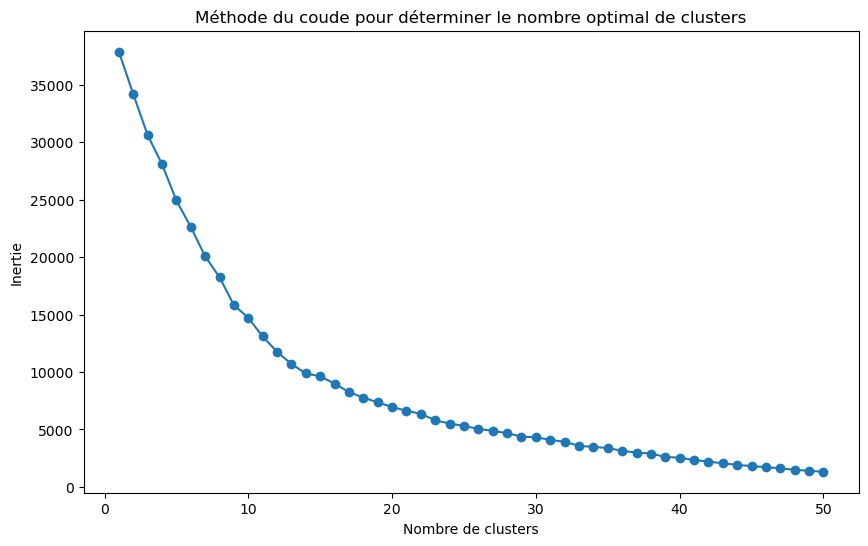

In [15]:
#CLUSTERING K MEANS

from sklearn.cluster import KMeans

# Liste pour stocker les valeurs de l'inertie
inertia = []

# Nombre de clusters que vous souhaitez tester
max_clusters = 50

for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Tracer le graphique de l'inertie en fonction du nombre de clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()

In [16]:
# Appliquer le clustering k-means

from sklearn.cluster import KMeans

n_clusters = 9  # Choisissez le nombre de clusters souhaité
kmeans = KMeans(n_clusters=n_clusters)
labels = kmeans.fit_predict(X_scaled)

Aggreg_Patients['Cluster']=labels
Aggreg_Patients['NIP'].nunique()

1994

             NIP  Cluster X_abscisse
0     N197403668        0    0.05015
1     N198300356        0   0.100301
2     N198300511        0   0.150451
3     N198302025        0   0.200602
4     N198302546        0   0.250752
...          ...      ...        ...
1496  N201805184        8  99.799398
1501  N201805208        8  99.849549
1546  N201805565        8  99.899699
1677  N201806433        8   99.94985
1829  N201807215        8      100.0

[1994 rows x 3 columns]
2023-11-07 13:30:05,218 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-11-07 13:30:05,220 INFO sqlalchemy.engine.Engine EXECUTE dbo.Delete_Table_if_exists Tmp_NIP_Cluster
2023-11-07 13:30:05,220 INFO sqlalchemy.engine.Engine [generated in 0.00086s] ()
2023-11-07 13:30:05,228 INFO sqlalchemy.engine.Engine COMMIT
2023-11-07 13:30:05,236 INFO sqlalchemy.engine.Engine SELECT [INFORMATION_SCHEMA].[TABLES].[TABLE_NAME], [INFORMATION_SCHEMA].[TABLES].[TABLE_TYPE] 
FROM [INFORMATION_SCHEMA].[TABLES] 
WHERE [INFORMATION_SCHEMA].[

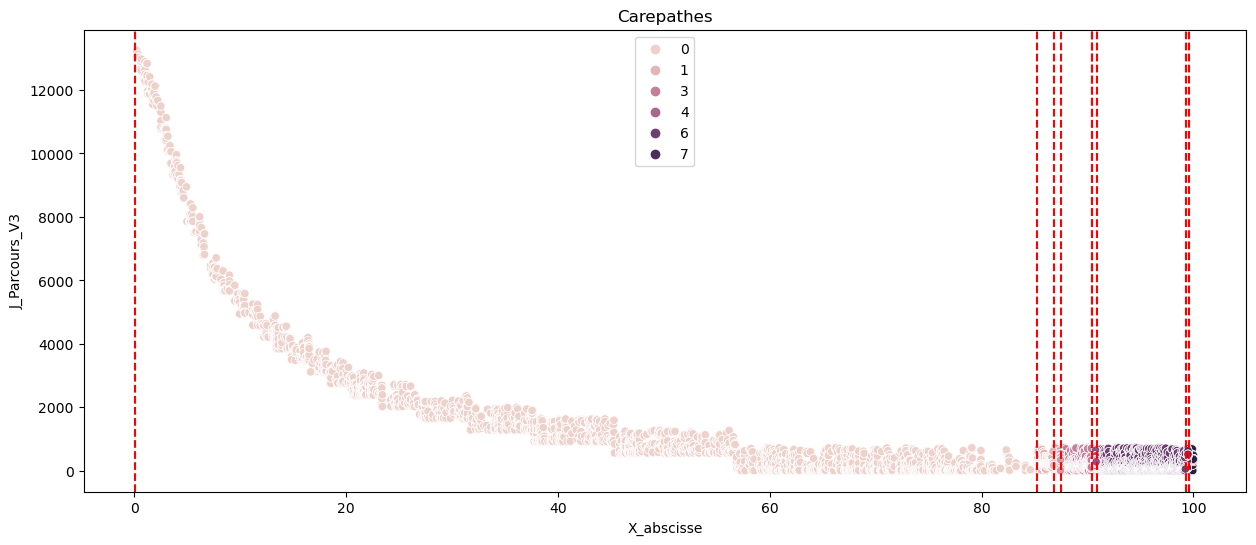

In [17]:
# Calculer le nombre de NIP dans chaque cluster
df_X_values = Aggreg_Patients['Cluster'].value_counts()
Nb_NIP=Aggreg_Patients['NIP'].nunique()

# Ajouter une colonne "X_abscisse" au DataFrame Parcours_Encoded_Total pour stocker les abscisses calculées
Aggreg_Patients['X_abscisse'] = None

Aggreg_Patients.sort_values(by=['Cluster','NIP'],inplace=True)
Aggreg_Patients


#First STEP
old_NIP=''
old_Cluster=-1
x_value=[]
x=0
NIP_Step = 100/Nb_NIP

for index,row in Aggreg_Patients.iterrows():

    if old_Cluster!=row['Cluster']:
        x += NIP_Step
        x_value.append(x)
        Aggreg_Patients.at[index,'X_abscisse']=x

    elif old_NIP!=row['NIP']:
        x += NIP_Step
        Aggreg_Patients.at[index,'X_abscisse']=x
    
    Aggreg_Patients.at[index,'X_abscisse']=x
    old_NIP=row['NIP']
    old_Cluster=row['Cluster']

# Afficher le DataFrame avec les abscisses calculées
print(Aggreg_Patients[['NIP', 'Cluster', 'X_abscisse']])


#Sauvegarder dans la BDD l'association NIP - Cluster
Table_Cluster='Tmp_NIP_Cluster' 
Requete = 'EXECUTE dbo.Delete_Table_if_exists ' + Table_Cluster
with AlSQL.engine.begin() as conn:
            conn.execute(sqlalchemy.text(Requete))

Aggreg_Patients[['NIP','Cluster','X_abscisse']].to_sql(Table_Cluster,AlSQL.engine)


#Recuperer une table acte avec les clusters
Requete="""SELECT Table_Acte.[NIP]
	  ,Table_Cluster.Cluster
	  ,Table_Cluster.X_abscisse
      ,Table_Acte.[J_Parcours_V1]
      ,Table_Acte.[J_Parcours_V3]
      ,Table_Acte.[Service]
      ,Table_Acte.[Activite]
      ,Table_Acte.[Phase]
      ,Table_Acte.[Dimension]
      ,Table_Acte.[Type_seq]
  FROM [ICO_Activite].[dbo].[Tmp_Carac_Actes] as Table_Acte
	 , [ICO_Activite].[dbo].[Tmp_NIP_Cluster] as Table_Cluster
  
  WHERE Table_Cluster.NIP = Table_Acte.NIP
        AND Table_Acte.[Service]='Radiothérapie'
"""
df_Actes_graph=AlSQL.AlSQL_Requete(AlSQL.engine,Requete,'No')

#Recuperer une table récapitulative des actes / Population de NIP avec les clusters
Requete="""SELECT 
	MIN(Table_NB_actes_cluster.Cluster) as Cluster
	,SUM(Table_NB_actes_cluster.Nb_Actes) as Nb_Actes
	,COUNT(Table_NB_actes_cluster.NIP) as Nb_NIP
FROM 
			(SELECT 
				   COUNT(Table_Acte.[NIP]) as Nb_Actes
				   ,Table_Cluster.[NIP] as NIP
				  ,MAX(Table_Cluster.Cluster) as Cluster
				  --,Table_Cluster.X_abscisse
				  --,Table_Acte.[J_Parcours_V1]
				  --,Table_Acte.[J_Parcours_V3]
				  --,Table_Acte.[Service]
				  --,Table_Acte.[Activite]
				  --,Table_Acte.[Phase]
				  --,Table_Acte.[Dimension]
				  --,Table_Acte.[Type_seq]
			  FROM [ICO_Activite].[dbo].[Tmp_Carac_Actes] as Table_Acte
				 , [ICO_Activite].[dbo].[Tmp_NIP_Cluster] as Table_Cluster
  
			  WHERE Table_Cluster.NIP = Table_Acte.NIP
					AND Table_Acte.[Service]='Radiothérapie'
			  GROUP BY Table_Cluster.NIP
			  ) as Table_NB_actes_cluster
  GROUP BY Cluster
  ORDER BY Cluster
"""
df_Cluster=AlSQL.AlSQL_Requete(AlSQL.engine,Requete,'No')
df_Cluster


fig, axs = plt.subplots(1, 1, figsize=(15, 6))

data_graph=df_Actes_graph


axs.set_title('Carepathes')
sns.scatterplot(data=df_Actes_graph, x=df_Actes_graph.X_abscisse, y='J_Parcours_V3',markers='Activite', hue='Cluster')

# Ajoutez la ligne horizontale
for x_value in x_value:
    axs.axvline(x=x_value, color='red', linestyle='--') #, label=f'Vertical Line at x={x_value}')

# Vous pouvez personnaliser la couleur, le style de ligne, et ajouter une légende
axs.legend()
plt.show()

#axs.flat[1].set_title('ratings_count boxplot')
#sns.boxplot(data=df, x='ratings_count', ax=axs[1])

In [18]:
df_Cluster

,Cluster,Nb_Actes,Nb_NIP
0,0,8664,698
1,1,1125,33
2,2,478,13
3,3,2059,58
4,4,9,1
5,5,293,8
6,6,5780,168
7,7,208,5
8,8,245,10


In [19]:
df_Cluster['pcent_actes']=df_Cluster['Nb_Actes']/df_Cluster['Nb_Actes'].sum()
df_Cluster



,Cluster,Nb_Actes,Nb_NIP,pcent_actes
0,0,8664,698,0.459361
1,1,1125,33,0.059647
2,2,478,13,0.025343
3,3,2059,58,0.109167
4,4,9,1,0.000477
5,5,293,8,0.015535
6,6,5780,168,0.306452
7,7,208,5,0.011028
8,8,245,10,0.012990


#LE CLUSTERING DES PARCOURS PAR TABLE D'ACTIVITE MENSUELLE N'EST PAS OPTIMAL
#Tentons de le faire à partir d'une table de Sequences de traitement.

In [20]:
#Recupération d'une table d'activité par patient 
#NIP, Séquence(s) + Elements caracteristiques des séquences

#Stratégie :
#1 - Analyser toutes les 1ères séquence de patients et les regrouper

Requete="""/****** Script for SelectTopNRows command from SSMS  ******/
SELECT Tble_Seq.[NIP]
      --,Tble_Seq.[id_Sequence]
	  --,MIN(T_Duree_Seq.DD_A) as DD_Seq
	  --,MAX(T_Duree_Seq.DF_A) as DF_Seq
	  --,MIN(T_J0V1234.J0_V1) as J0_V1
	  ,DATEDIFF(DAY,MIN(T_J0V1234.J0_V1),MIN(T_Duree_Seq.DD_A)) as JP_V1
	  --,DATEDIFF(DAY,MIN(T_J0V1234.J0_V2),MIN(T_Duree_Seq.DD_A)) as JP_V2
	  --,DATEDIFF(DAY,MIN(T_J0V1234.J0_V3),MIN(T_Duree_Seq.DD_A)) as JP_V3 
	  --,DATEDIFF(DAY,MIN(T_J0V1234.J0_V4),MIN(T_Duree_Seq.DD_A)) as JP_V4
	  --,DATEDIFF(DAY,MIN(T_Duree_Seq.DD_A),MAX(T_Duree_Seq.DF_A))+1 as Duree_Seq
      ,COUNT(Tble_Seq.[N_S]) Nb_sejours
      --,Tble_Seq.[Ddebsej]
      --,Tble_Seq.[J0_V3]
      --,Tble_Seq.[J0_V4]
      ,SUM(Tble_Seq.[Poids_Sejour_DS]) as Poids_Sej
      ,MIN(Tble_Seq.[Type_Sequence]) as Type_seq
	  --,Table_Acte_C.Id_A_Caracteristique
	  --,MIN(Table_Actes.UFX) as UFX
	  ,Min(Table_Actes.UFX_CL) as UFX_CL
	  ,MIN(T_List_UF.Service) as My_Service
	  ,MIN(T_List_UF.Activite) as Activite

  FROM [ICO_Activite].[dbo].[Tmp_Type_Sequence] as Tble_Seq
		, [ICO_Activite].[dbo].[Tmp_A3_Soins] as Table_Acte_C
		, [ICO_Activite].[dbo].[Tmp_A_Actes_Table_Analyse] as Table_Actes
		, [ICO_Activite].[dbo].[Listing_UF_V3] as T_List_UF
		, [ICO_Activite].[dbo].[Tmp_Sequence_Encoded] as T_Duree_Seq
		, [ICO_Activite].[dbo].[Tmp_NIP_J0] as T_J0V1234
  WHERE
		Tble_Seq.N_S=Table_Acte_C.N_S AND
		Table_Acte_C.Id_A_Caracteristique=Table_Actes.ID_A AND
		T_List_UF.UFX_Code=Table_Actes.UFX AND
		Tble_Seq.id_Sequence=T_Duree_Seq.id_Sequence AND
		Tble_Seq.NIP=T_J0V1234.NIP
		--AND Tble_Seq.NIP='N199804183'
		--AND
		--Type_Sequence='TRAIT'
  GROUP BY Tble_Seq.id_Sequence,Tble_Seq.NIP
  ORDER BY NIP,Tble_Seq.id_Sequence"""

df_time_seq=AlSQL.AlSQL_Requete(AlSQL.engine,Requete,'No')

2023-11-07 13:30:07,417 INFO sqlalchemy.engine.Engine /****** Script for SelectTopNRows command from SSMS  ******/
SELECT Tble_Seq.[NIP]
      --,Tble_Seq.[id_Sequence]
	  --,MIN(T_Duree_Seq.DD_A) as DD_Seq
	  --,MAX(T_Duree_Seq.DF_A) as DF_Seq
	  --,MIN(T_J0V1234.J0_V1) as J0_V1
	  ,DATEDIFF(DAY,MIN(T_J0V1234.J0_V1),MIN(T_Duree_Seq.DD_A)) as JP_V1
	  --,DATEDIFF(DAY,MIN(T_J0V1234.J0_V2),MIN(T_Duree_Seq.DD_A)) as JP_V2
	  --,DATEDIFF(DAY,MIN(T_J0V1234.J0_V3),MIN(T_Duree_Seq.DD_A)) as JP_V3 
	  --,DATEDIFF(DAY,MIN(T_J0V1234.J0_V4),MIN(T_Duree_Seq.DD_A)) as JP_V4
	  --,DATEDIFF(DAY,MIN(T_Duree_Seq.DD_A),MAX(T_Duree_Seq.DF_A))+1 as Duree_Seq
      ,COUNT(Tble_Seq.[N_S]) Nb_sejours
      --,Tble_Seq.[Ddebsej]
      --,Tble_Seq.[J0_V3]
      --,Tble_Seq.[J0_V4]
      ,SUM(Tble_Seq.[Poids_Sejour_DS]) as Poids_Sej
      ,MIN(Tble_Seq.[Type_Sequence]) as Type_seq
	  --,Table_Acte_C.Id_A_Caracteristique
	  --,MIN(Table_Actes.UFX) as UFX
	  ,Min(Table_Actes.UFX_CL) as UFX_CL
	  ,MIN(T_List_UF.Se

In [21]:
df_time_seq[['NIP','JP_V1','Nb_sejours','Poids_Sej','My_Service','Type_seq']]

,NIP,JP_V1,Nb_sejours,Poids_Sej,My_Service,Type_seq
0,N197403668,0,3,3.000000e+11,Oncologie Medicale,TRAIT
1,N197403668,38,1,2.000000e+06,Oncologie Medicale,SUIVI_CT
2,N197403668,42,3,3.000000e+11,Oncologie Medicale,TRAIT
3,N197403668,79,2,2.000400e+06,Imagerie Médicale,SUIVI_CT
4,N197403668,85,8,9.000000e+11,Chirurgie,TRAIT
...,...,...,...,...,...,...
14340,N201900413,481,1,1.000000e+11,Oncologie Medicale,TRAIT
14341,N201900413,502,1,2.000000e+11,Oncologie Medicale,TRAIT
14342,N201900413,579,3,6.002600e+06,Imagerie Médicale,SUIVI_LT
14343,N201906335,0,1,1.000000e+02,Anapath,INIT_NEW


In [22]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#ONE HOT ENCODING 'MY_SERVICE'
my_service_column = df_time_seq['My_Service']
label_encoder = LabelEncoder()
my_service_encoded = label_encoder.fit_transform(my_service_column)

onehot_encoder = OneHotEncoder(sparse=False)
my_service_onehot = onehot_encoder.fit_transform(my_service_encoded.reshape(-1, 1))

# Créez un DataFrame à partir de la matrice One-Hot
my_service_df = pd.DataFrame(my_service_onehot, columns=[f'My_Service_{label}' for label in label_encoder.classes_])

# Concaténez le DataFrame One-Hot avec le DataFrame d'origine
df_time_seq = pd.concat([df_time_seq, my_service_df], axis=1)

# Supprimez la colonne d'origine 'My_Service' si nécessaire
df_time_seq.drop('My_Service', axis=1, inplace=True)


#ONE HOT ENCODING 'Type_seq'
my_service_column = df_time_seq['Type_seq']
label_encoder = LabelEncoder()
my_service_encoded = label_encoder.fit_transform(my_service_column)

onehot_encoder = OneHotEncoder(sparse=False)
my_service_onehot = onehot_encoder.fit_transform(my_service_encoded.reshape(-1, 1))

# Créez un DataFrame à partir de la matrice One-Hot
my_service_df = pd.DataFrame(my_service_onehot, columns=[f'Type_seq_{label}' for label in label_encoder.classes_])

# Concaténez le DataFrame One-Hot avec le DataFrame d'origine
df_time_seq = pd.concat([df_time_seq, my_service_df], axis=1)

# Supprimez la colonne d'origine 'My_Service' si nécessaire
df_time_seq.drop('Type_seq', axis=1, inplace=True)


# Affichez le DataFrame résultant
df_time_seq.drop([	'Nb_sejours',	'Poids_Sej', 'UFX_CL', 'Activite'], axis=1, inplace=True)

df_time_seq

,NIP,JP_V1,My_Service_Anapath,My_Service_Autre,My_Service_Cardiologie,My_Service_Chirurgie,My_Service_Imagerie Médicale,My_Service_Laboratoire,My_Service_Médecine Nucléaire,My_Service_Oncologie Medicale,My_Service_Radio Interventionnelle,My_Service_Radiothérapie,My_Service_UDTP,Type_seq_INIT_NEW,Type_seq_INIT_OLD,Type_seq_SUIVI_CT,Type_seq_SUIVI_LT,Type_seq_TRAIT
0,N197403668,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,N197403668,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,N197403668,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,N197403668,79,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,N197403668,85,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14340,N201900413,481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14341,N201900413,502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14342,N201900413,579,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14343,N201906335,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [23]:
#To be tested on Actes / Sejours / Sequences Time series
#This libaray doesn't work with categorical values -> Modify Service + Activité in OneHotEncoding (0/1) to be passed into this library !

df_time_feature=tsfresh.extract_features(df_time_seq,column_id='NIP',column_sort='JP_V1',column_kind=None, column_value=None)

Feature Extraction: 100%|██████████| 50/50 [05:28<00:00,  6.57s/it]


In [24]:
df_time_feature

,My_Service_Anapath__variance_larger_than_standard_deviation,My_Service_Anapath__has_duplicate_max,My_Service_Anapath__has_duplicate_min,My_Service_Anapath__has_duplicate,My_Service_Anapath__sum_values,My_Service_Anapath__abs_energy,My_Service_Anapath__mean_abs_change,My_Service_Anapath__mean_change,My_Service_Anapath__mean_second_derivative_central,My_Service_Anapath__median,...,Type_seq_TRAIT__fourier_entropy__bins_5,Type_seq_TRAIT__fourier_entropy__bins_10,Type_seq_TRAIT__fourier_entropy__bins_100,Type_seq_TRAIT__permutation_entropy__dimension_3__tau_1,Type_seq_TRAIT__permutation_entropy__dimension_4__tau_1,Type_seq_TRAIT__permutation_entropy__dimension_5__tau_1,Type_seq_TRAIT__permutation_entropy__dimension_6__tau_1,Type_seq_TRAIT__permutation_entropy__dimension_7__tau_1,Type_seq_TRAIT__query_similarity_count__query_None__threshold_0.0,Type_seq_TRAIT__mean_n_absolute_max__number_of_maxima_7
N197403668,0.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.950271,1.332179,1.609438,1.329661,1.332179,1.386294,1.098612,0.693147,NaN,0.571429
N198300356,0.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,1.098612,1.098612,1.098612,0.693147,-0.000000,NaN,NaN,NaN,NaN,NaN
N198300511,0.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,1.098612,1.098612,1.098612,1.098612,0.693147,-0.000000,NaN,NaN,NaN,NaN
N198302025,0.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,1.039721,1.039721,1.039721,0.693147,0.636514,0.693147,-0.000000,NaN,NaN,NaN
N198302546,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N201900121,0.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.636514,1.098612,1.098612,0.693147,-0.000000,NaN,NaN,NaN,NaN,NaN
N201900122,0.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.735622,1.213008,1.906155,1.351681,1.748155,1.893788,2.025326,2.197225,NaN,1.000000
N201900123,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N201900413,0.0,0.0,1.0,1.0,1.0,1.0,0.052632,-0.052632,0.027778,0.0,...,0.600166,1.033562,2.271869,1.276257,1.645917,1.766690,1.801892,1.846889,NaN,1.000000


In [25]:
rows_with_infinity = df_time_feature.index[df_time_feature.isin([np.inf, -np.inf]).any(1)]
columns_with_infinity = df_time_feature.columns[df_time_feature.isin([np.inf, -np.inf]).any()]

rows_with_Nan = df_time_feature.index[df_time_feature.isna().any(1)]
columns_with_Nan = df_time_feature.columns[df_time_feature.isna().any()]

#print("Colonnes avec des valeurs infinies :")
#print(columns_with_infinity)
#print("Colonnes avec des valeurs Nan :")
#print(columns_with_Nan)
print("Nb de lignes avec des valeurs infinies : " + str(len(rows_with_infinity)))
print("Nb de colonnes avec des valeurs infinies : " + str(len(columns_with_infinity)))

print("Nb de lignes avec des valeurs NaN : " + str(len(rows_with_Nan)))
print("Nb de colonnes avec des valeurs  NaN " + str(len(columns_with_Nan)))


# Combine columns with infinity and NaN
columns_to_remove = list(set(columns_with_infinity) | set(columns_with_Nan))

# Remove the identified columns from the DataFrame
df_time_feature = df_time_feature.drop(columns=columns_with_Nan)

#df_time_feature.loc[rows_with_infinity,:]
#df = df_time_feature.drop(rows_with_infinity)

Nb de lignes avec des valeurs infinies : 606
Nb de colonnes avec des valeurs infinies : 37
Nb de lignes avec des valeurs NaN : 1991
Nb de colonnes avec des valeurs  NaN 9392


In [26]:
df_time_feature

,My_Service_Anapath__variance_larger_than_standard_deviation,My_Service_Anapath__has_duplicate_max,My_Service_Anapath__has_duplicate_min,My_Service_Anapath__has_duplicate,My_Service_Anapath__sum_values,My_Service_Anapath__abs_energy,My_Service_Anapath__median,My_Service_Anapath__mean,My_Service_Anapath__length,My_Service_Anapath__standard_deviation,...,Type_seq_TRAIT__ratio_beyond_r_sigma__r_6,Type_seq_TRAIT__ratio_beyond_r_sigma__r_7,Type_seq_TRAIT__ratio_beyond_r_sigma__r_10,Type_seq_TRAIT__count_above__t_0,Type_seq_TRAIT__count_below__t_0,Type_seq_TRAIT__lempel_ziv_complexity__bins_2,Type_seq_TRAIT__lempel_ziv_complexity__bins_3,Type_seq_TRAIT__lempel_ziv_complexity__bins_5,Type_seq_TRAIT__lempel_ziv_complexity__bins_10,Type_seq_TRAIT__lempel_ziv_complexity__bins_100
N197403668,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.00,8.0,0.000000,...,0.0,0.0,0.0,1.0,0.50,0.500000,0.500000,0.500000,0.500000,0.500000
N198300356,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.00,4.0,0.000000,...,0.0,0.0,0.0,1.0,0.75,0.750000,0.750000,0.750000,0.750000,0.750000
N198300511,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.00,5.0,0.000000,...,0.0,0.0,0.0,1.0,0.60,0.600000,0.600000,0.600000,0.600000,0.600000
N198302025,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.00,6.0,0.000000,...,0.0,0.0,0.0,1.0,0.50,0.500000,0.500000,0.500000,0.500000,0.500000
N198302546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.000000,...,0.0,0.0,0.0,1.0,1.00,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N201900121,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.00,4.0,0.000000,...,0.0,0.0,0.0,1.0,0.75,0.500000,0.500000,0.500000,0.500000,0.500000
N201900122,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.00,15.0,0.000000,...,0.0,0.0,0.0,1.0,0.40,0.466667,0.466667,0.466667,0.466667,0.466667
N201900123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.000000,...,0.0,0.0,0.0,1.0,1.00,1.000000,1.000000,1.000000,1.000000,1.000000
N201900413,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.05,20.0,0.217945,...,0.0,0.0,0.0,1.0,0.45,0.400000,0.400000,0.400000,0.400000,0.400000


In [27]:
#Try a clustering on this table to create different categories of patients based on their Radiotherapie Treatment.

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_time_feature)


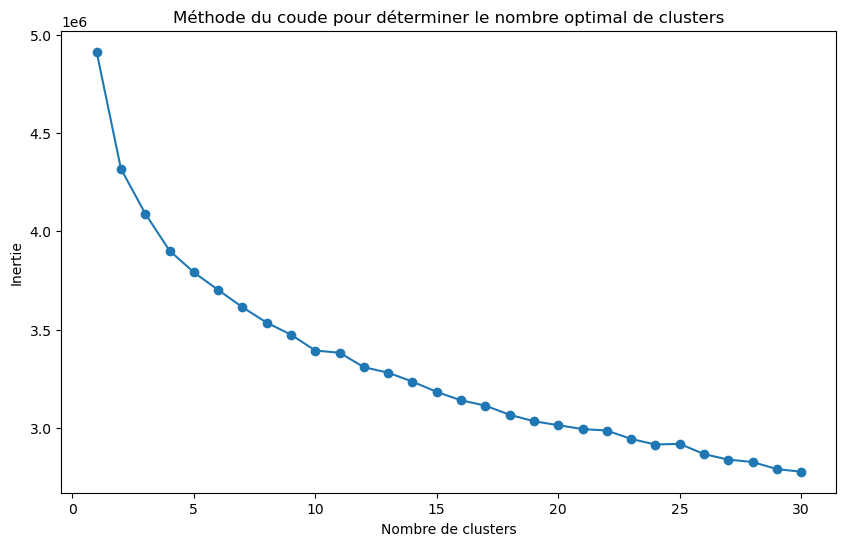

In [28]:
#CLUSTERING K MEANS

from sklearn.cluster import KMeans

# Liste pour stocker les valeurs de l'inertie
inertia = []

# Nombre de clusters que vous souhaitez tester
max_clusters = 30

for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Tracer le graphique de l'inertie en fonction du nombre de clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()

In [29]:
# Appliquer le clustering k-means

"""
from sklearn.cluster import KMeans

n_clusters = 20  # Choisissez le nombre de clusters souhaité
kmeans = KMeans(n_clusters=n_clusters)
labels = kmeans.fit_predict(X_scaled)

df_time_feature['Cluster']=labels
df_time_feature.index.nunique()
"""



"\nfrom sklearn.cluster import KMeans\n\nn_clusters = 20  # Choisissez le nombre de clusters souhaité\nkmeans = KMeans(n_clusters=n_clusters)\nlabels = kmeans.fit_predict(X_scaled)\n\ndf_time_feature['Cluster']=labels\ndf_time_feature.index.nunique()\n"

In [30]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 5  # Choose the number of clusters you want
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
labels = agglomerative.fit_predict(X_scaled)

df_time_feature['Cluster'] = labels
unique_clusters = df_time_feature['Cluster'].nunique()

# The 'Cluster' column in df_time_feature now contains the cluster labels assigned by agglomerative clustering.
# The variable unique_clusters will give you the number of unique clusters found.


In [31]:
#DBSCAN CLUSTERING
"""
from sklearn.cluster import DBSCAN

X_scaled=df_time_feature

# Define the DBSCAN model with epsilon and minimum samples
eps = 0.5  # Adjust epsilon as needed
min_samples = 5  # Adjust the minimum number of samples as needed
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the DBSCAN model and obtain the cluster labels
labels = dbscan.fit_predict(X_scaled)

df_time_feature['Cluster'] = labels

# The 'Cluster' column in df_time_feature now contains the cluster labels assigned by DBSCAN.
"""


"\nfrom sklearn.cluster import DBSCAN\n\nX_scaled=df_time_feature\n\n# Define the DBSCAN model with epsilon and minimum samples\neps = 0.5  # Adjust epsilon as needed\nmin_samples = 5  # Adjust the minimum number of samples as needed\ndbscan = DBSCAN(eps=eps, min_samples=min_samples)\n\n# Fit the DBSCAN model and obtain the cluster labels\nlabels = dbscan.fit_predict(X_scaled)\n\ndf_time_feature['Cluster'] = labels\n\n# The 'Cluster' column in df_time_feature now contains the cluster labels assigned by DBSCAN.\n"

In [32]:
df_time_feature1=df_time_feature.reset_index(names='NIP')

In [33]:
#Sauvegarder dans la BDD l'association NIP - Cluster
Table_Cluster='Tmp_NIP_Cluster' 
Requete = 'EXECUTE dbo.Delete_Table_if_exists ' + Table_Cluster
with AlSQL.engine.begin() as conn:
            conn.execute(sqlalchemy.text(Requete))
df_time_feature1[['NIP','Cluster']].to_sql(Table_Cluster,AlSQL.engine)


#Recuperer une LISTE DE NIP, CLUSTER, ORDONNEES PAR PATIENT LE PLUS RECEMMENT ACTIF

Requete = """
    SELECT T_Actes.[NIP]
        ,MAX(T_Actes.[DD_A]) as Last_Act
        ,T_Cluster.Cluster as Cluster
    FROM 
            [ICO_Activite].[dbo].[Tmp_A_Actes_Table_Analyse] as T_Actes,
            [ICO_Activite].[dbo].[Tmp_NIP_Cluster] as T_Cluster
    WHERE
            T_Cluster.NIP=T_Actes.NIP
    GROUP BY T_Actes.NIP, T_Cluster.CLUSTER
    ORDER BY Cluster, Last_Act desc
  """

df_NIP_Cluster=AlSQL.AlSQL_Requete(AlSQL.engine,Requete,'No')




# Calculer le nombre de NIP dans chaque cluster
df_X_values = df_NIP_Cluster['Cluster'].value_counts()
Nb_NIP=df_NIP_Cluster['NIP'].nunique()

# Ajouter une colonne "X_abscisse" au DataFrame Parcours_Encoded_Total pour stocker les abscisses calculées
df_NIP_Cluster['X_abscisse'] = None

df_NIP_Cluster




2023-11-07 13:38:18,161 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-11-07 13:38:18,163 INFO sqlalchemy.engine.Engine EXECUTE dbo.Delete_Table_if_exists Tmp_NIP_Cluster
2023-11-07 13:38:18,164 INFO sqlalchemy.engine.Engine [cached since 492.9s ago] ()
2023-11-07 13:38:18,172 INFO sqlalchemy.engine.Engine COMMIT
2023-11-07 13:38:18,179 INFO sqlalchemy.engine.Engine SELECT [INFORMATION_SCHEMA].[TABLES].[TABLE_NAME], [INFORMATION_SCHEMA].[TABLES].[TABLE_TYPE] 
FROM [INFORMATION_SCHEMA].[TABLES] 
WHERE [INFORMATION_SCHEMA].[TABLES].[TABLE_NAME] = CAST(? AS NVARCHAR(max)) AND [INFORMATION_SCHEMA].[TABLES].[TABLE_SCHEMA] = CAST(? AS NVARCHAR(max))
2023-11-07 13:38:18,180 INFO sqlalchemy.engine.Engine [cached since 492.9s ago] ('Tmp_NIP_Cluster', 'dbo')
2023-11-07 13:38:18,184 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-11-07 13:38:18,186 INFO sqlalchemy.engine.Engine 
CREATE TABLE [Tmp_NIP_Cluster] (
	[index] BIGINT NULL, 
	[NIP] VARCHAR(max) NULL, 
	[Cluster] BIGINT NULL
)




,NIP,Last_Act,Cluster,X_abscisse
0,N201600777,2020-12-31,0,None
1,N198600899,2020-12-30,0,None
2,N201704399,2020-12-29,0,None
3,N199901885,2020-12-29,0,None
4,N198410788,2020-12-29,0,None
...,...,...,...,...
1986,N201802724,2019-05-26,4,None
1987,N201504689,2019-04-18,4,None
1988,N201804406,2019-04-15,4,None
1989,N201805791,2019-03-06,4,None


             NIP  Cluster X_abscisse
0     N201600777        0   0.050226
1     N198600899        0   0.100452
2     N201704399        0   0.150678
3     N199901885        0   0.200904
4     N198410788        0    0.25113
...          ...      ...        ...
1986  N201802724        4  99.799096
1987  N201504689        4  99.849322
1988  N201804406        4  99.899548
1989  N201805791        4  99.949774
1990  N201807401        4      100.0

[1991 rows x 3 columns]
2023-11-07 15:39:59,869 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-11-07 15:39:59,874 INFO sqlalchemy.engine.Engine EXECUTE dbo.Delete_Table_if_exists Tmp_NIP_Cluster2
2023-11-07 15:39:59,875 INFO sqlalchemy.engine.Engine [generated in 0.00210s] ()
2023-11-07 15:39:59,883 INFO sqlalchemy.engine.Engine COMMIT
2023-11-07 15:39:59,898 INFO sqlalchemy.engine.Engine SELECT [INFORMATION_SCHEMA].[TABLES].[TABLE_NAME], [INFORMATION_SCHEMA].[TABLES].[TABLE_TYPE] 
FROM [INFORMATION_SCHEMA].[TABLES] 
WHERE [INFORMATION_SCHEMA].

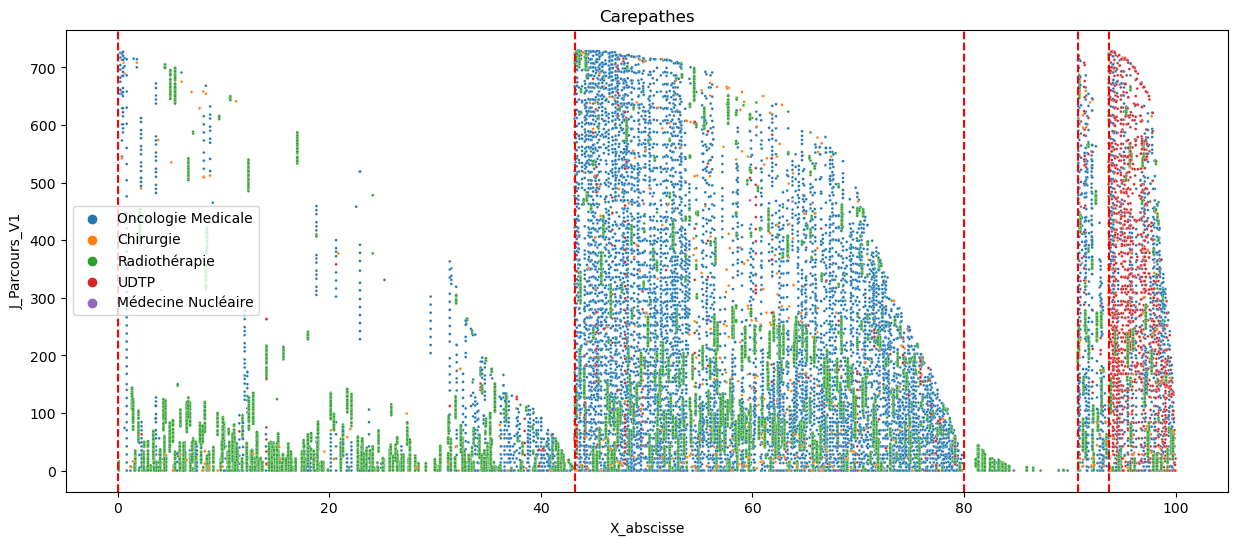

In [34]:
#First STEP
old_NIP=''
old_Cluster=-1
x_value=[]
x=0
NIP_Step = 100/Nb_NIP

for index,row in df_NIP_Cluster.iterrows():

    if old_Cluster!=row['Cluster']:
        x += NIP_Step
        x_value.append(x)
        df_NIP_Cluster.at[index,'X_abscisse']=x

    elif old_NIP!=row['NIP']:
        x += NIP_Step
        df_NIP_Cluster.at[index,'X_abscisse']=x
    
    df_NIP_Cluster.at[index,'X_abscisse']=x
    old_NIP=row['NIP']
    old_Cluster=row['Cluster']

# Afficher le DataFrame avec les abscisses calculées
print(df_NIP_Cluster[['NIP','Cluster', 'X_abscisse']])

#Sauvegarder dans la BDD l'association NIP - Cluster - Abscisse
Table_Cluster='Tmp_NIP_Cluster2' 
Requete = 'EXECUTE dbo.Delete_Table_if_exists ' + Table_Cluster
with AlSQL.engine.begin() as conn:
            conn.execute(sqlalchemy.text(Requete))

df_NIP_Cluster[['NIP','Cluster','X_abscisse']].to_sql(Table_Cluster,AlSQL.engine)


#Recuperer une table acte avec les clusters
Requete="""SELECT Table_Acte.[NIP]
	  ,Table_Cluster.Cluster
	  ,Table_Cluster.X_abscisse
      ,Table_Acte.[J_Parcours_V1]
      ,Table_Acte.[J_Parcours_V3]
      ,Table_Acte.[Service]
      ,Table_Acte.[Activite]
      ,Table_Acte.[Phase]
      ,Table_Acte.[Dimension]
      ,Table_Acte.[Type_seq]
  FROM [ICO_Activite].[dbo].[Tmp_Carac_Actes] as Table_Acte
	 , [ICO_Activite].[dbo].[Tmp_NIP_Cluster2] as Table_Cluster
  
  WHERE Table_Cluster.NIP = Table_Acte.NIP
        AND Table_Acte.[Phase]='Traitement'
        --AND Table_Acte.[Service]='Imagerie'
"""
df_Actes_graph=AlSQL.AlSQL_Requete(AlSQL.engine,Requete,'No')

#Recuperer une table récapitulative des actes / Population de NIP avec les clusters
Requete="""SELECT 
	MIN(Table_NB_actes_cluster.Cluster) as Cluster
	,SUM(Table_NB_actes_cluster.Nb_Actes) as Nb_Actes
	,COUNT(Table_NB_actes_cluster.NIP) as Nb_NIP
FROM 
			(SELECT 
				   COUNT(Table_Acte.[NIP]) as Nb_Actes
				   ,Table_Cluster.[NIP] as NIP
				  ,MAX(Table_Cluster.Cluster) as Cluster
				  --,Table_Cluster.X_abscisse
				  --,Table_Acte.[J_Parcours_V1]
				  --,Table_Acte.[J_Parcours_V3]
				  --,Table_Acte.[Service]
				  --,Table_Acte.[Activite]
				  --,Table_Acte.[Phase]
				  --,Table_Acte.[Dimension]
				  --,Table_Acte.[Type_seq]
			  FROM [ICO_Activite].[dbo].[Tmp_Carac_Actes] as Table_Acte
				 , [ICO_Activite].[dbo].[Tmp_NIP_Cluster2] as Table_Cluster
  
			  WHERE Table_Cluster.NIP = Table_Acte.NIP
					--AND Table_Acte.[Type_seq]='TRAIT'
                              
			  GROUP BY Table_Cluster.NIP
			  ) as Table_NB_actes_cluster
  GROUP BY Cluster
  ORDER BY Cluster
"""
df_Cluster=AlSQL.AlSQL_Requete(AlSQL.engine,Requete,'No')
df_Cluster


fig, axs = plt.subplots(1, 1, figsize=(15, 6))

data_graph=df_Actes_graph


axs.set_title('Carepathes')
sns.scatterplot(data=df_Actes_graph, x=df_Actes_graph.X_abscisse, y='J_Parcours_V1',markers='Activite', hue='Service', s=4)

# Ajoutez la ligne horizontale
for x_value in x_value:
    axs.axvline(x=x_value, color='red', linestyle='--') #, label=f'Vertical Line at x={x_value}')

fig.savefig("votre_graphique.svg", format="svg")

# Vous pouvez personnaliser la couleur, le style de ligne, et ajouter une légende
axs.legend()
plt.show()

#axs.flat[1].set_title('ratings_count boxplot')
#sns.boxplot(data=df, x='ratings_count', ax=axs[1])


In [32]:
df_Cluster['pcent_actes']=df_Cluster['Nb_Actes']/df_Cluster['Nb_Actes'].sum()
df_Cluster

,Cluster,Nb_Actes,Nb_NIP,pcent_actes
0,0,9305,348,0.045837
1,1,33971,281,0.167345
2,2,2411,28,0.011877
3,3,21641,94,0.106606
4,4,7722,78,0.038039
5,5,3132,215,0.015429
6,6,2888,21,0.014227
7,7,1774,15,0.008739
8,8,34322,117,0.169074
9,9,13396,93,0.065990


# ESSAI DE CLUSTERING A PARTIR D'UNE AGGREGATIONS DE SEJOURS ( SANS CONSIDERER LA NOTION D'ACTE CARACTERISTIQUE)
# AJOUTER UNE PROCHAINE OPTION SUR CETTE BASE AVEC UN REGROUPEMENT PAR Sejour voire Sequence et décomposer les colonnes CT par type se service et activité. 

In [33]:
Requete="""

SELECT Table_Actes.[NIP]
      --,Tble_Seq.[id_Sequence]
	  --,MIN(T_Duree_Seq.DD_A) as DD_Seq
	  --,MAX(T_Duree_Seq.DF_A) as DF_Seq
	  --,MIN(T_J0V1234.J0_V1) as J0_V1
	  --,DATEDIFF(DAY,T_J0V1234.J0_V1,T_Duree_Seq.DD_A) as JP_V1
	  --,DATEDIFF(DAY,MIN(T_J0V1234.J0_V2),MIN(T_Duree_Seq.DD_A)) as JP_V2
	  ,DATEDIFF(DAY,T_J0V1234.J0_V3,Table_Actes.DD_A) as JP_Vx
	  --,DATEDIFF(DAY,MIN(T_J0V1234.J0_V4),MIN(T_Duree_Seq.DD_A)) as JP_V4
	  --,DATEDIFF(DAY,MIN(T_Duree_Seq.DD_A),MAX(T_Duree_Seq.DF_A))+1 as Duree_Seq
      ,Table_Actes.[N_S] as Num_sejours
      --,Tble_Seq.[Ddebsej]
      --,Tble_Seq.[J0_V3]
      --,Tble_Seq.[J0_V4]
      --,Tble_Seq.[Poids_Sejour_DS]
      --,Tble_Seq.[Type_Sequence]
	  --,Table_Acte_C.Id_A_Caracteristique
	  --,MIN(Table_Actes.UFX) as UFX
	  --,T_List_UF.Phase_Parcours as Phase
	  ,CASE WHEN T_List_UF.Phase_Parcours = 'Consultation'  THEN 1 ELSE  0 END as Ct_Cs
	  ,CASE WHEN T_List_UF.Phase_Parcours = 'Diagnostic'  THEN 1 ELSE  0 END as Ct_Diag
	  ,CASE WHEN T_List_UF.Phase_Parcours = 'Traitement'  THEN 1 ELSE  0 END as Ct_Trait
	  ,CASE WHEN T_List_UF.Phase_Parcours = 'Soins'  THEN 1 ELSE  0 END as Ct_Soins
	  ,CASE WHEN T_List_UF.Phase_Parcours = 'Accompagnement'  THEN 1 ELSE  0 END as Ct_Acc
	  ,CASE WHEN T_List_UF.Phase_Parcours = 'Hors_ICO'  THEN 1 ELSE  0 END as Ct_Hors_ICO
	  ,CASE WHEN T_List_UF.Phase_Parcours = 'Lourd'  THEN 1 ELSE  0 END as Ct_Lourd
	  ,CASE WHEN T_List_UF.Phase_Parcours = 'NC'  THEN 1 ELSE  0 END as Ct_NC
	  ,CASE WHEN T_List_UF.Phase_Parcours = 'TT ou Diag A def'  THEN 1 ELSE  0 END as Ct_TT_ou_Diag

	  ,T_List_UF.Service as My_Service
	  ,T_List_UF.Activite as Activite

  FROM 
		  [ICO_Activite].[dbo].[Tmp_A_Actes_Table_Analyse] as Table_Actes
		, [ICO_Activite].[dbo].[Listing_UF_V3] as T_List_UF
		, [ICO_Activite].[dbo].[Tmp_NIP_J0] as T_J0V1234
  WHERE
		T_List_UF.UFX_Code=Table_Actes.UFX AND
		Table_Actes.NIP=T_J0V1234.NIP

  ORDER BY NIP,Table_Actes.N_S
"""

df_time_seq=AlSQL.AlSQL_Requete(AlSQL.engine,Requete,'No')

2023-11-04 17:40:44,586 INFO sqlalchemy.engine.Engine 

SELECT Table_Actes.[NIP]
      --,Tble_Seq.[id_Sequence]
	  --,MIN(T_Duree_Seq.DD_A) as DD_Seq
	  --,MAX(T_Duree_Seq.DF_A) as DF_Seq
	  --,MIN(T_J0V1234.J0_V1) as J0_V1
	  --,DATEDIFF(DAY,T_J0V1234.J0_V1,T_Duree_Seq.DD_A) as JP_V1
	  --,DATEDIFF(DAY,MIN(T_J0V1234.J0_V2),MIN(T_Duree_Seq.DD_A)) as JP_V2
	  ,DATEDIFF(DAY,T_J0V1234.J0_V3,Table_Actes.DD_A) as JP_Vx
	  --,DATEDIFF(DAY,MIN(T_J0V1234.J0_V4),MIN(T_Duree_Seq.DD_A)) as JP_V4
	  --,DATEDIFF(DAY,MIN(T_Duree_Seq.DD_A),MAX(T_Duree_Seq.DF_A))+1 as Duree_Seq
      ,Table_Actes.[N_S] as Num_sejours
      --,Tble_Seq.[Ddebsej]
      --,Tble_Seq.[J0_V3]
      --,Tble_Seq.[J0_V4]
      --,Tble_Seq.[Poids_Sejour_DS]
      --,Tble_Seq.[Type_Sequence]
	  --,Table_Acte_C.Id_A_Caracteristique
	  --,MIN(Table_Actes.UFX) as UFX
	  --,T_List_UF.Phase_Parcours as Phase
	  ,CASE WHEN T_List_UF.Phase_Parcours = 'Consultation'  THEN 1 ELSE  0 END as Ct_Cs
	  ,CASE WHEN T_List_UF.Phase_Parcours = 

In [34]:
df_time_seq

,NIP,JP_Vx,Num_sejours,Ct_Cs,Ct_Diag,Ct_Trait,Ct_Soins,Ct_Acc,Ct_Hors_ICO,Ct_Lourd,Ct_NC,Ct_TT_ou_Diag,My_Service,Activite
0,N197403668,16261,N1773929,0,1,0,0,0,0,0,0,0,Laboratoire,Diagnostic
1,N197403668,16261,N1773929,0,0,0,0,0,0,1,0,0,Oncologie Medicale,Semaine
2,N197403668,16261,N1773929,0,0,1,0,0,0,0,0,0,Oncologie Medicale,Ambulatoire
3,N197403668,16261,N1773929,0,1,0,0,0,0,0,0,0,Laboratoire,Diagnostic
4,N197403668,16261,N1773929,0,1,0,0,0,0,0,0,0,Laboratoire,Diagnostic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203095,N201906335,266,N1909035,1,0,0,0,0,0,0,0,0,Oncologie Medicale,Consultations
203096,N201906335,0,N1989273,0,1,0,0,0,0,0,0,0,Anapath,Labo
203097,N201906335,479,N2017919,0,1,0,0,0,0,0,0,0,Oncologie Medicale,Genetique
203098,N201906335,479,N2017919,0,1,0,0,0,0,0,0,0,Oncologie Medicale,Genetique


In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#ONE HOT ENCODING 'MY_SERVICE'
my_service_column = df_time_seq['My_Service']
label_encoder = LabelEncoder()
my_service_encoded = label_encoder.fit_transform(my_service_column)

onehot_encoder = OneHotEncoder(sparse=False)
my_service_onehot = onehot_encoder.fit_transform(my_service_encoded.reshape(-1, 1))

# Créez un DataFrame à partir de la matrice One-Hot
my_service_df = pd.DataFrame(my_service_onehot, columns=[f'My_Service_{label}' for label in label_encoder.classes_])

# Concaténez le DataFrame One-Hot avec le DataFrame d'origine
df_time_seq = pd.concat([df_time_seq, my_service_df], axis=1)

# Supprimez la colonne d'origine 'My_Service' si nécessaire
df_time_seq.drop('My_Service', axis=1, inplace=True)


#ONE HOT ENCODING 'Type_seq'
my_service_column = df_time_seq['Activite']
label_encoder = LabelEncoder()
my_service_encoded = label_encoder.fit_transform(my_service_column)

onehot_encoder = OneHotEncoder(sparse=False)
my_service_onehot = onehot_encoder.fit_transform(my_service_encoded.reshape(-1, 1))

# Créez un DataFrame à partir de la matrice One-Hot
my_service_df = pd.DataFrame(my_service_onehot, columns=[f'Activite_{label}' for label in label_encoder.classes_])

# Concaténez le DataFrame One-Hot avec le DataFrame d'origine
df_time_seq = pd.concat([df_time_seq, my_service_df], axis=1)

# Supprimez la colonne d'origine 'My_Service' si nécessaire
df_time_seq.drop('Activite', axis=1, inplace=True)


df_time_seq

,NIP,JP_Vx,Num_sejours,Ct_Cs,Ct_Diag,Ct_Trait,Ct_Soins,Ct_Acc,Ct_Hors_ICO,Ct_Lourd,...,Activite_Scintigraphie,Activite_Semaine,Activite_Senologie,Activite_Soins infirmiers,Activite_Sous-traitance,Activite_TEP,Activite_Thérapie,Activite_Traitement,Activite_USC,Activite_autre
0,N197403668,16261,N1773929,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,N197403668,16261,N1773929,0,0,0,0,0,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,N197403668,16261,N1773929,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,N197403668,16261,N1773929,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,N197403668,16261,N1773929,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203095,N201906335,266,N1909035,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203096,N201906335,0,N1989273,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203097,N201906335,479,N2017919,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203098,N201906335,479,N2017919,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# ATTENTION ! ICI ON REGROUPE PAR N° DE SEJOUR, ON SOMME LES SERVICES INDEPENDAMMENT SI LE SEJOUR RELEVE D'UN TRAITEMENT OU NON

In [36]:
# GROUPER LE DATASET PAR NIP + JP_Vx + aggréger les num de séjours en nb de sejours, + sommer toute les autres colonnes. (Actes caractéristiques uniquement)

# Liste des colonnes à sommer
columns_to_sum = [col for col in df_time_seq.columns if col not in ['NIP', 'JP_Vx', 'Num_sejours']]


# Groupez par 'NIP' et 'JP_V1', appliquez COUNT au 'num_sejour' et sommez les autres colonnes
grouped_df = df_time_seq.groupby(['NIP', 'JP_Vx']).agg({
    'Num_sejours': 'count',  # Applique COUNT au 'num_sejour'
    # Sommez les autres colonnes
    **{col: 'sum' for col in columns_to_sum}
}).reset_index()

grouped_df.rename(columns={'Num_sejours': 'Count_Num_Sejour'}, inplace=True)



In [37]:
grouped_df

,NIP,JP_Vx,Count_Num_Sejour,Ct_Cs,Ct_Diag,Ct_Trait,Ct_Soins,Ct_Acc,Ct_Hors_ICO,Ct_Lourd,...,Activite_Scintigraphie,Activite_Semaine,Activite_Senologie,Activite_Soins infirmiers,Activite_Sous-traitance,Activite_TEP,Activite_Thérapie,Activite_Traitement,Activite_USC,Activite_autre
0,N197403668,16261,6,0,4,1,0,0,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,N197403668,16275,1,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,N197403668,16289,1,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,N197403668,16299,2,2,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,N197403668,16303,1,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50577,N201900413,700,4,0,4,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50578,N201900413,704,21,3,17,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50579,N201906335,0,1,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50580,N201906335,266,2,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#To be tested on Actes / Sejours / Sequences Time series
#This libaray doesn't work with categorical values -> Modify Service + Activité in OneHotEncoding (0/1) to be passed into this library !

df_time_feature=tsfresh.extract_features(grouped_df,column_id='NIP',column_sort='JP_Vx',column_kind=None, column_value=None)

Feature Extraction:   0%|          | 0/50 [00:00<?, ?it/s]

Feature Extraction: 100%|██████████| 50/50 [10:23<00:00, 12.46s/it] 


In [39]:
rows_with_infinity = df_time_feature.index[df_time_feature.isin([np.inf, -np.inf]).any(1)]
columns_with_infinity = df_time_feature.columns[df_time_feature.isin([np.inf, -np.inf]).any()]

rows_with_Nan = df_time_feature.index[df_time_feature.isna().any(1)]
columns_with_Nan = df_time_feature.columns[df_time_feature.isna().any()]

#print("Colonnes avec des valeurs infinies :")
#print(columns_with_infinity)
#print("Colonnes avec des valeurs Nan :")
#print(columns_with_Nan)
print("Nb de lignes avec des valeurs NaN : " + str(len(rows_with_infinity)))
print("Nb de colonnes avec des valeurs NaN : " + str(len(columns_with_infinity)))

print("Nb de lignes avec des valeurs infinies : " + str(len(rows_with_Nan)))
print("Nb de colonnes avec des valeurs infinies : " + str(len(columns_with_Nan)))


# Combine columns with infinity and NaN
columns_to_remove = list(set(columns_with_infinity) | set(columns_with_Nan))
# Remove the identified columns from the DataFrame
df_time_feature = df_time_feature.drop(columns=columns_to_remove)

#df_time_feature.loc[rows_with_infinity,:]
#df = df_time_feature.drop(rows_with_infinity)

Nb de lignes avec des valeurs NaN : 504
Nb de colonnes avec des valeurs NaN : 85
Nb de lignes avec des valeurs infinies : 1994
Nb de colonnes avec des valeurs infinies : 31676


In [40]:
#Try a clustering on this table to create different categories of patients based on their Radiotherapie Treatment.

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_time_feature)

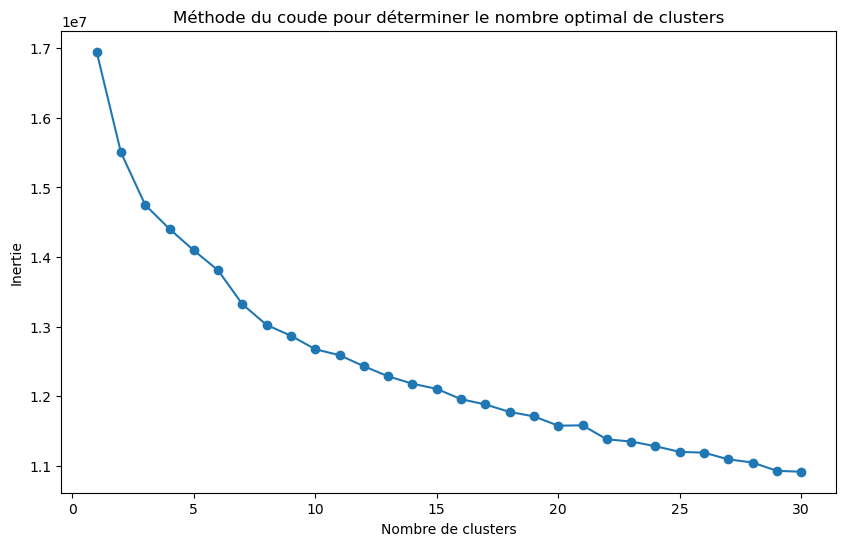

In [41]:
#CLUSTERING K MEANS

from sklearn.cluster import KMeans

# Liste pour stocker les valeurs de l'inertie
inertia = []

# Nombre de clusters que vous souhaitez tester
max_clusters = 30

for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Tracer le graphique de l'inertie en fonction du nombre de clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()

In [42]:
# Appliquer le clustering k-means

"""
from sklearn.cluster import KMeans

n_clusters = 10  # Choisissez le nombre de clusters souhaité
kmeans = KMeans(n_clusters=n_clusters)
labels = kmeans.fit_predict(X_scaled)

df_time_feature['Cluster']=labels
df_time_feature.index.nunique()
"""



"\nfrom sklearn.cluster import KMeans\n\nn_clusters = 10  # Choisissez le nombre de clusters souhaité\nkmeans = KMeans(n_clusters=n_clusters)\nlabels = kmeans.fit_predict(X_scaled)\n\ndf_time_feature['Cluster']=labels\ndf_time_feature.index.nunique()\n"

In [43]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 30  # Choose the number of clusters you want
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
labels = agglomerative.fit_predict(X_scaled)

df_time_feature['Cluster'] = labels
unique_clusters = df_time_feature['Cluster'].nunique()

# The 'Cluster' column in df_time_feature now contains the cluster labels assigned by agglomerative clustering.
# The variable unique_clusters will give you the number of unique clusters found.


In [44]:
#DBSCAN CLUSTERING

"""from sklearn.cluster import DBSCAN

# Define the DBSCAN model with epsilon and minimum samples
eps = 0.5  # Adjust epsilon as needed
min_samples = 5  # Adjust the minimum number of samples as needed
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the DBSCAN model and obtain the cluster labels
labels = dbscan.fit_predict(X_scaled)

df_time_feature['Cluster'] = labels

# The 'Cluster' column in df_time_feature now contains the cluster labels assigned by DBSCAN.

"""

"from sklearn.cluster import DBSCAN\n\n# Define the DBSCAN model with epsilon and minimum samples\neps = 0.5  # Adjust epsilon as needed\nmin_samples = 5  # Adjust the minimum number of samples as needed\ndbscan = DBSCAN(eps=eps, min_samples=min_samples)\n\n# Fit the DBSCAN model and obtain the cluster labels\nlabels = dbscan.fit_predict(X_scaled)\n\ndf_time_feature['Cluster'] = labels\n\n# The 'Cluster' column in df_time_feature now contains the cluster labels assigned by DBSCAN.\n\n"

In [45]:
df_time_feature1=df_time_feature.reset_index(names='NIP')

In [46]:
# Calculer le nombre de NIP dans chaque cluster
df_X_values = df_time_feature1['Cluster'].value_counts()
Nb_NIP=df_time_feature1['NIP'].nunique()

# Ajouter une colonne "X_abscisse" au DataFrame Parcours_Encoded_Total pour stocker les abscisses calculées
df_time_feature1['X_abscisse'] = None

df_time_feature1.sort_values(by=['Cluster','NIP'],inplace=True)
df_time_feature1




,NIP,My_Service_Médecine Nucléaire__variance_larger_than_standard_deviation,My_Service_Médecine Nucléaire__has_duplicate_max,My_Service_Médecine Nucléaire__has_duplicate_min,My_Service_Médecine Nucléaire__has_duplicate,My_Service_Médecine Nucléaire__sum_values,My_Service_Médecine Nucléaire__abs_energy,My_Service_Médecine Nucléaire__median,My_Service_Médecine Nucléaire__mean,My_Service_Médecine Nucléaire__length,...,My_Service_Laboratoire__ratio_beyond_r_sigma__r_10,My_Service_Laboratoire__count_above__t_0,My_Service_Laboratoire__count_below__t_0,My_Service_Laboratoire__lempel_ziv_complexity__bins_2,My_Service_Laboratoire__lempel_ziv_complexity__bins_3,My_Service_Laboratoire__lempel_ziv_complexity__bins_5,My_Service_Laboratoire__lempel_ziv_complexity__bins_10,My_Service_Laboratoire__lempel_ziv_complexity__bins_100,Cluster,X_abscisse
0,N197403668,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.000000,32.0,...,0.0,1.0,0.781250,0.281250,0.312500,0.375000,0.406250,0.406250,0,None
5,N198303522,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.000000,33.0,...,0.0,1.0,0.848485,0.242424,0.242424,0.303030,0.303030,0.333333,0,None
8,N198401875,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.045455,22.0,...,0.0,1.0,0.545455,0.318182,0.363636,0.363636,0.454545,0.454545,0,None
16,N198502208,0.0,0.0,1.0,1.0,3.0,9.0,0.0,0.125000,24.0,...,0.0,1.0,0.625000,0.291667,0.416667,0.416667,0.458333,0.500000,0,None
22,N198509758,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.023810,42.0,...,0.0,1.0,0.928571,0.238095,0.238095,0.238095,0.238095,0.238095,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637,N201806241,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.000000,39.0,...,0.0,1.0,0.769231,0.256410,0.282051,0.333333,0.358974,0.358974,28,None
1669,N201806402,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.000000,37.0,...,0.0,1.0,0.864865,0.243243,0.270270,0.270270,0.270270,0.270270,28,None
1936,N201900066,0.0,0.0,1.0,1.0,4.0,10.0,0.0,0.050633,79.0,...,0.0,1.0,0.848101,0.202532,0.202532,0.240506,0.240506,0.240506,28,None
338,N201000969,0.0,1.0,1.0,1.0,8.0,14.0,0.0,0.052288,153.0,...,0.0,1.0,0.588235,0.183007,0.222222,0.274510,0.333333,0.385621,29,None


             NIP  Cluster X_abscisse
0     N197403668        0    0.05015
5     N198303522        0   0.100301
8     N198401875        0   0.150451
16    N198502208        0   0.200602
22    N198509758        0   0.250752
...          ...      ...        ...
1637  N201806241       28  99.799398
1669  N201806402       28  99.849549
1936  N201900066       28  99.899699
338   N201000969       29   99.94985
1836  N201807248       29      100.0

[1994 rows x 3 columns]
2023-11-04 17:57:56,920 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-11-04 17:57:56,928 INFO sqlalchemy.engine.Engine EXECUTE dbo.Delete_Table_if_exists Tmp_NIP_Cluster
2023-11-04 17:57:56,929 INFO sqlalchemy.engine.Engine [cached since 1366s ago] ()
2023-11-04 17:57:56,938 INFO sqlalchemy.engine.Engine COMMIT
2023-11-04 17:57:56,944 INFO sqlalchemy.engine.Engine SELECT [INFORMATION_SCHEMA].[TABLES].[TABLE_NAME], [INFORMATION_SCHEMA].[TABLES].[TABLE_TYPE] 
FROM [INFORMATION_SCHEMA].[TABLES] 
WHERE [INFORMATION_SCHEMA].

2023-11-04 17:57:57,505 INFO sqlalchemy.engine.Engine COMMIT
2023-11-04 17:57:57,508 INFO sqlalchemy.engine.Engine SELECT [INFORMATION_SCHEMA].[TABLES].[TABLE_NAME] 
FROM [INFORMATION_SCHEMA].[TABLES] 
WHERE [INFORMATION_SCHEMA].[TABLES].[TABLE_SCHEMA] = CAST(? AS NVARCHAR(max)) AND [INFORMATION_SCHEMA].[TABLES].[TABLE_TYPE] = CAST(? AS NVARCHAR(max)) ORDER BY [INFORMATION_SCHEMA].[TABLES].[TABLE_NAME]
2023-11-04 17:57:57,509 INFO sqlalchemy.engine.Engine [cached since 1365s ago] ('dbo', 'BASE TABLE')
2023-11-04 17:57:57,513 INFO sqlalchemy.engine.Engine SELECT Table_Acte.[NIP]
	  ,Table_Cluster.Cluster
	  ,Table_Cluster.X_abscisse
      ,Table_Acte.[J_Parcours_V1]
      ,Table_Acte.[J_Parcours_V3]
      ,Table_Acte.[Service]
      ,Table_Acte.[Activite]
      ,Table_Acte.[Phase]
      ,Table_Acte.[Dimension]
      ,Table_Acte.[Type_seq]
  FROM [ICO_Activite].[dbo].[Tmp_Carac_Actes] as Table_Acte
	 , [ICO_Activite].[dbo].[Tmp_NIP_Cluster] as Table_Cluster
  
  WHERE Table_Cluster.NIP =

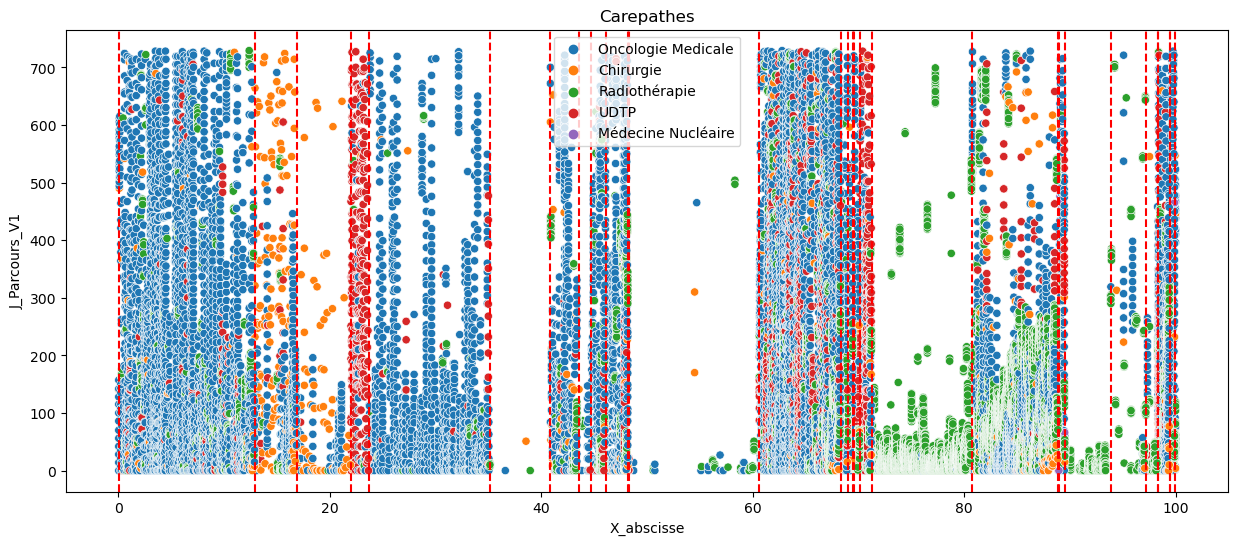

In [47]:
#First STEP
old_NIP=''
old_Cluster=-1
x_value=[]
x=0
NIP_Step = 100/Nb_NIP

for index,row in df_time_feature1.iterrows():

    if old_Cluster!=row['Cluster']:
        x += NIP_Step
        x_value.append(x)
        df_time_feature1.at[index,'X_abscisse']=x

    elif old_NIP!=row['NIP']:
        x += NIP_Step
        df_time_feature1.at[index,'X_abscisse']=x
    
    df_time_feature1.at[index,'X_abscisse']=x
    old_NIP=row['NIP']
    old_Cluster=row['Cluster']

# Afficher le DataFrame avec les abscisses calculées
print(df_time_feature1[['NIP','Cluster', 'X_abscisse']])

#Sauvegarder dans la BDD l'association NIP - Cluster
Table_Cluster='Tmp_NIP_Cluster' 
Requete = 'EXECUTE dbo.Delete_Table_if_exists ' + Table_Cluster
with AlSQL.engine.begin() as conn:
            conn.execute(sqlalchemy.text(Requete))

df_time_feature1[['NIP','Cluster','X_abscisse']].to_sql(Table_Cluster,AlSQL.engine)


#Recuperer une table acte avec les clusters
Requete="""SELECT Table_Acte.[NIP]
	  ,Table_Cluster.Cluster
	  ,Table_Cluster.X_abscisse
      ,Table_Acte.[J_Parcours_V1]
      ,Table_Acte.[J_Parcours_V3]
      ,Table_Acte.[Service]
      ,Table_Acte.[Activite]
      ,Table_Acte.[Phase]
      ,Table_Acte.[Dimension]
      ,Table_Acte.[Type_seq]
  FROM [ICO_Activite].[dbo].[Tmp_Carac_Actes] as Table_Acte
	 , [ICO_Activite].[dbo].[Tmp_NIP_Cluster] as Table_Cluster
  
  WHERE Table_Cluster.NIP = Table_Acte.NIP
        AND Table_Acte.[Phase]='Traitement'
"""
df_Actes_graph=AlSQL.AlSQL_Requete(AlSQL.engine,Requete,'No')

#Recuperer une table récapitulative des actes / Population de NIP avec les clusters
Requete="""SELECT 
	MIN(Table_NB_actes_cluster.Cluster) as Cluster
	,SUM(Table_NB_actes_cluster.Nb_Actes) as Nb_Actes
	,COUNT(Table_NB_actes_cluster.NIP) as Nb_NIP
FROM 
			(SELECT 
				   COUNT(Table_Acte.[NIP]) as Nb_Actes
				   ,Table_Cluster.[NIP] as NIP
				  ,MAX(Table_Cluster.Cluster) as Cluster
				  --,Table_Cluster.X_abscisse
				  --,Table_Acte.[J_Parcours_V1]
				  --,Table_Acte.[J_Parcours_V3]
				  --,Table_Acte.[Service]
				  --,Table_Acte.[Activite]
				  --,Table_Acte.[Phase]
				  --,Table_Acte.[Dimension]
				  --,Table_Acte.[Type_seq]
			  FROM [ICO_Activite].[dbo].[Tmp_Carac_Actes] as Table_Acte
				 , [ICO_Activite].[dbo].[Tmp_NIP_Cluster] as Table_Cluster
  
			  WHERE Table_Cluster.NIP = Table_Acte.NIP
					AND Table_Acte.[Type_seq]='TRAIT'
                              
			  GROUP BY Table_Cluster.NIP
			  ) as Table_NB_actes_cluster
  GROUP BY Cluster
  ORDER BY Cluster
"""
df_Cluster=AlSQL.AlSQL_Requete(AlSQL.engine,Requete,'No')
df_Cluster


fig, axs = plt.subplots(1, 1, figsize=(15, 6))

data_graph=df_Actes_graph


axs.set_title('Carepathes')
sns.scatterplot(data=df_Actes_graph, x=df_Actes_graph.X_abscisse, y='J_Parcours_V1',markers='Activite', hue='Service')

# Ajoutez la ligne horizontale
for x_value in x_value:
    axs.axvline(x=x_value, color='red', linestyle='--') #, label=f'Vertical Line at x={x_value}')

# Vous pouvez personnaliser la couleur, le style de ligne, et ajouter une légende
axs.legend()
plt.show()

#axs.flat[1].set_title('ratings_count boxplot')
#sns.boxplot(data=df, x='ratings_count', ax=axs[1])


In [48]:
df_Cluster['pcent_actes']=df_Cluster['Nb_Actes']/df_Cluster['Nb_Actes'].sum()
df_Cluster

,Cluster,Nb_Actes,Nb_NIP,pcent_actes
0,0,15523,252,0.159784
1,1,2433,79,0.025044
2,2,795,96,0.008183
3,3,6814,32,0.070139
4,4,3308,126,0.034050
5,5,33,8,0.000340
6,6,8327,54,0.085713
7,7,131,11,0.001348
8,8,3247,28,0.033423
9,9,2039,31,0.020988
